**This project is about classifying three plant species based on their Sepal length,Sepal width,Petal length,Petal width using Logistic Regression,Decision tree and Random Forest classifiers.**

#Loading the dataset

In [68]:
import seaborn as sns

In [67]:
sns.load_dataset('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df=sns.load_dataset('iris')

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Size of the dataset:**

In [ ]:
df.shape

(150, 5)

In [ ]:
# Number of record=150;
# Number of features=5;

**Unique features of the dataset to be classified:**

In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

#Data Visualization

In [18]:
import matplotlib.pyplot as plt


**Scatter Plots:**

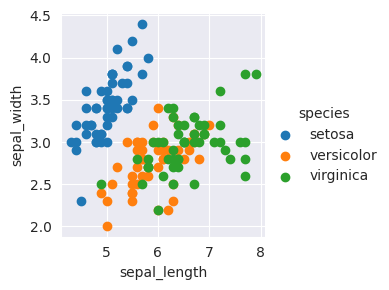

In [ ]:
#sepal length vs sepal width
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="species")\
  .map(plt.scatter,"sepal_length","sepal_width").add_legend()
plt.show()

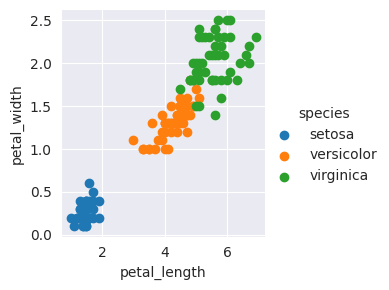

In [ ]:
#petal length vs petal width
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="species")\
  .map(plt.scatter,"petal_length","petal_width").add_legend()
plt.show()

**Pair plot:**

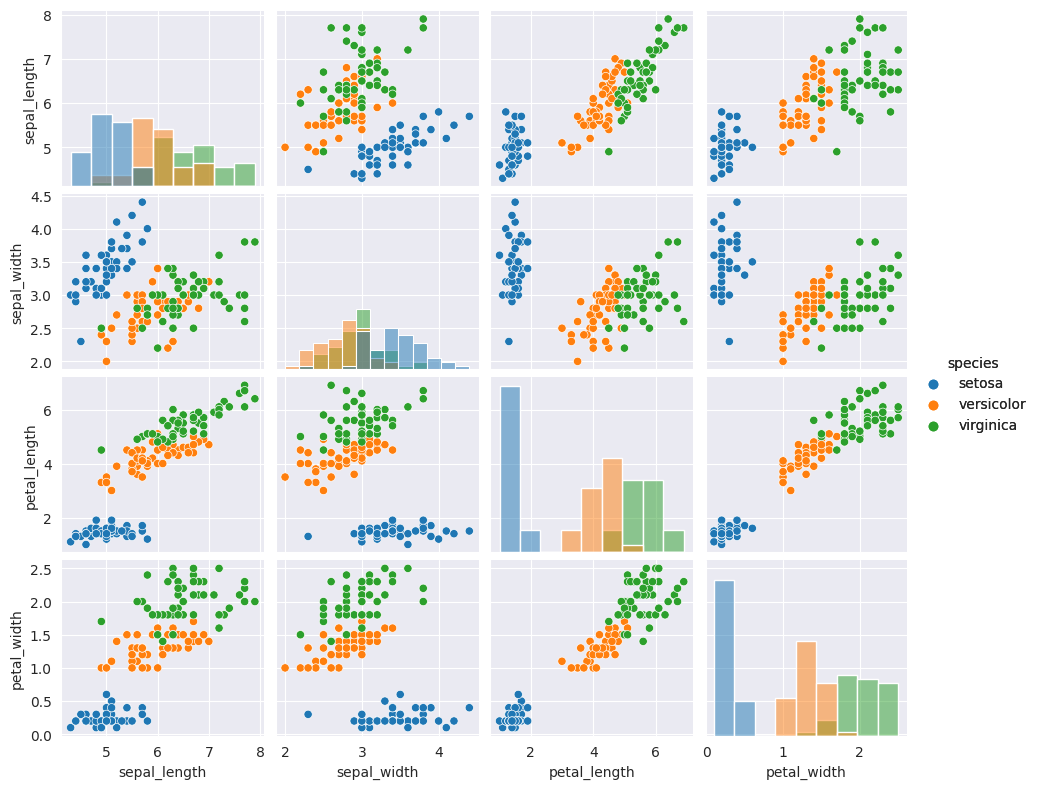

In [ ]:
sns.set_style("darkgrid")
sns.pairplot(df,hue="species",height=2,diag_kind="hist").add_legend()
plt.show()

**Box plots:**

<Axes: xlabel='species', ylabel='petal_width'>

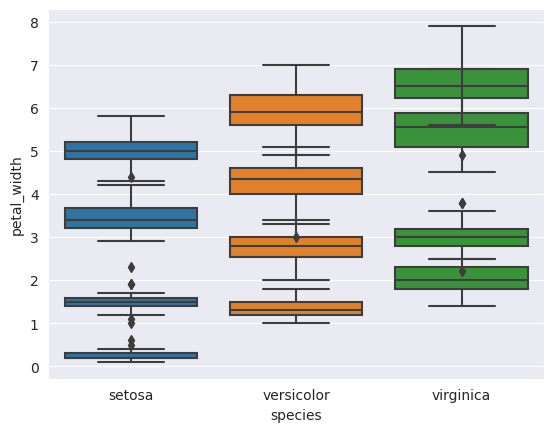

In [ ]:
sns.boxplot(x="species",y="sepal_length",data=df)
sns.boxplot(x="species",y="sepal_width",data=df)
sns.boxplot(x="species",y="petal_length",data=df)
sns.boxplot(x="species",y="petal_width",data=df)

**Kernel Distribution Estimate:**

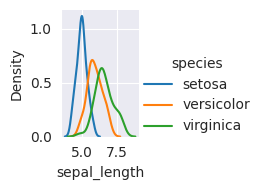

In [ ]:
sns.FacetGrid(df,hue="species",height=2)\
  .map(sns.kdeplot,"sepal_length").add_legend()
plt.show()

**Line plot:**

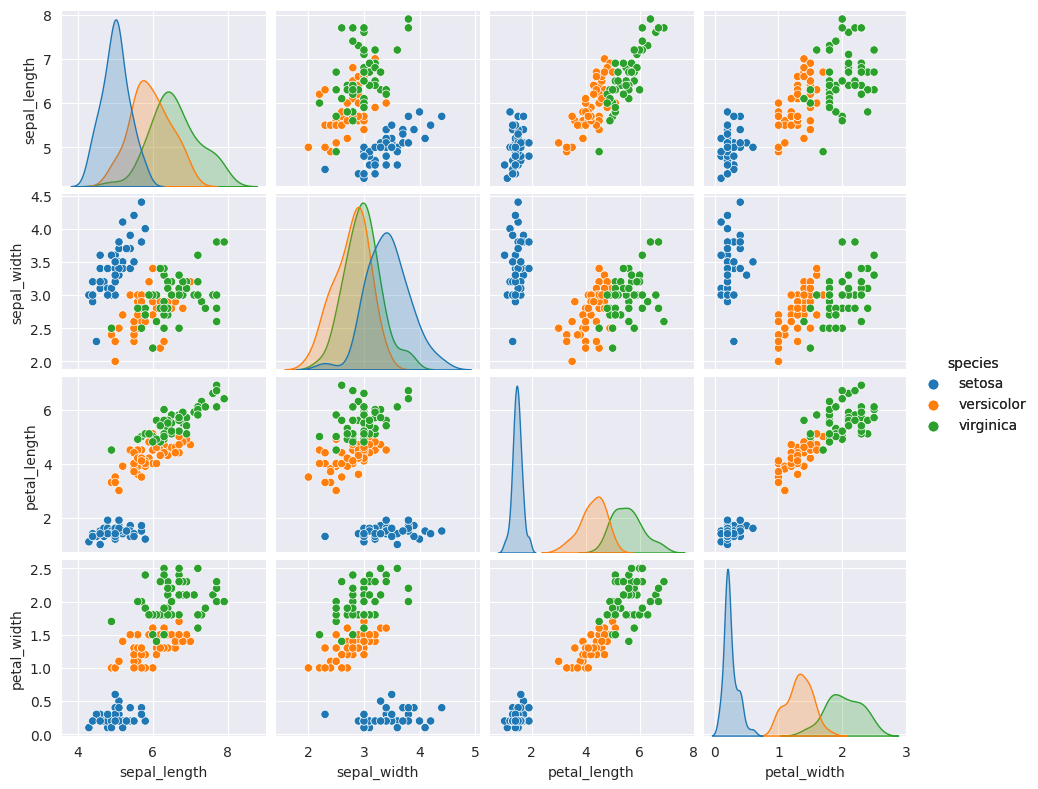

In [ ]:
sns.set_style("darkgrid")
sns.pairplot(df,hue="species",height=2).add_legend()
plt.show()

**Line plots:**

<function matplotlib.pyplot.show(close=None, block=None)>

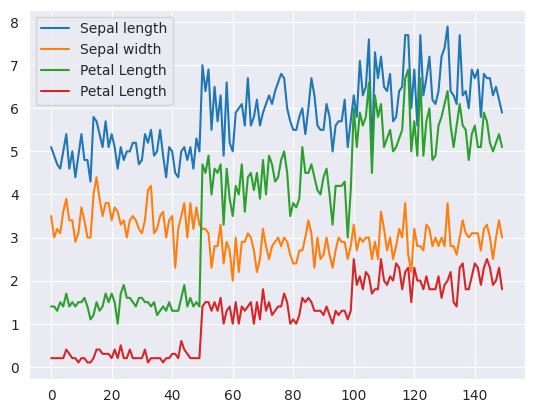

In [ ]:
plt.plot(df["sepal_length"],label="Sepal length")
plt.plot(df["sepal_width"],label="Sepal width")
plt.plot(df["petal_length"],label="Petal Length")
plt.plot(df["petal_width"],label="Petal Length")
plt.legend()
plt.show

**The correlation matrix:**

In [ ]:
df.corr()

<ipython-input-19-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<ipython-input-20-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

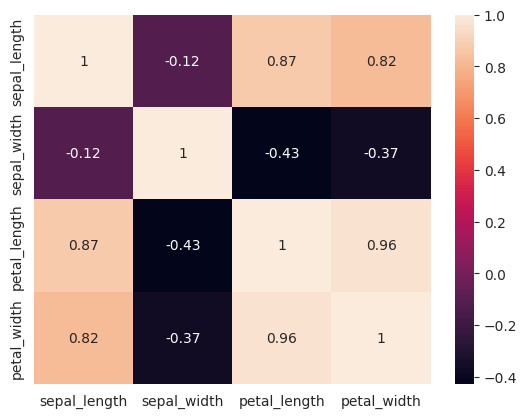

In [ ]:
sns.heatmap(df.corr(),annot=True)

#Data Preprocessing

In [5]:
X=(df.drop(["species"],axis=1))

In [6]:
Y=df["species"]

**Label encoding:**

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
Y=le.fit_transform(Y)

In [9]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Spliting the training and testing data:**

In [10]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=2)

#Logistic regression

In [51]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='newton-cg')
lr.fit(X_train,Y_train)

LogisticRegression(solver='newton-cg')

In [52]:
Y_pred1=lr.predict(X_test)

**Evaluation:**

In [53]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred1)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 11]])

Text(50.722222222222214, 0.5, 'Predicted values')

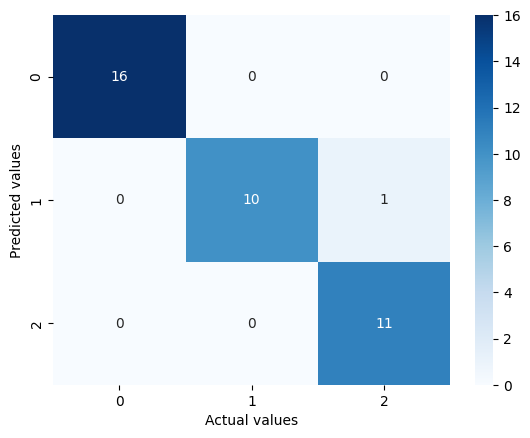

In [54]:
sns.heatmap(data=confusion_matrix(Y_test,Y_pred1),annot=True,cmap='Blues')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [55]:
#Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred1)

0.9736842105263158

#Decision tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [57]:
Y_pred2=dtree.predict(X_test)

**Evaluation:**

In [58]:
#confusion matrix
confusion_matrix(Y_test,Y_pred2)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 10]])

Text(50.722222222222214, 0.5, 'Predicted values')

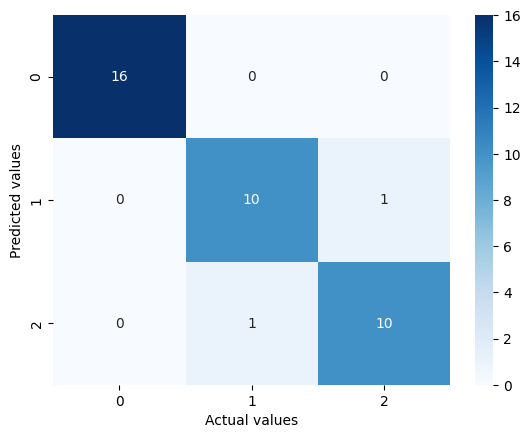

In [59]:
sns.heatmap(data=confusion_matrix(Y_test,Y_pred2),annot=True,cmap='Blues')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [60]:
#Accuracy score
accuracy_score(Y_test,Y_pred2)

0.9473684210526315

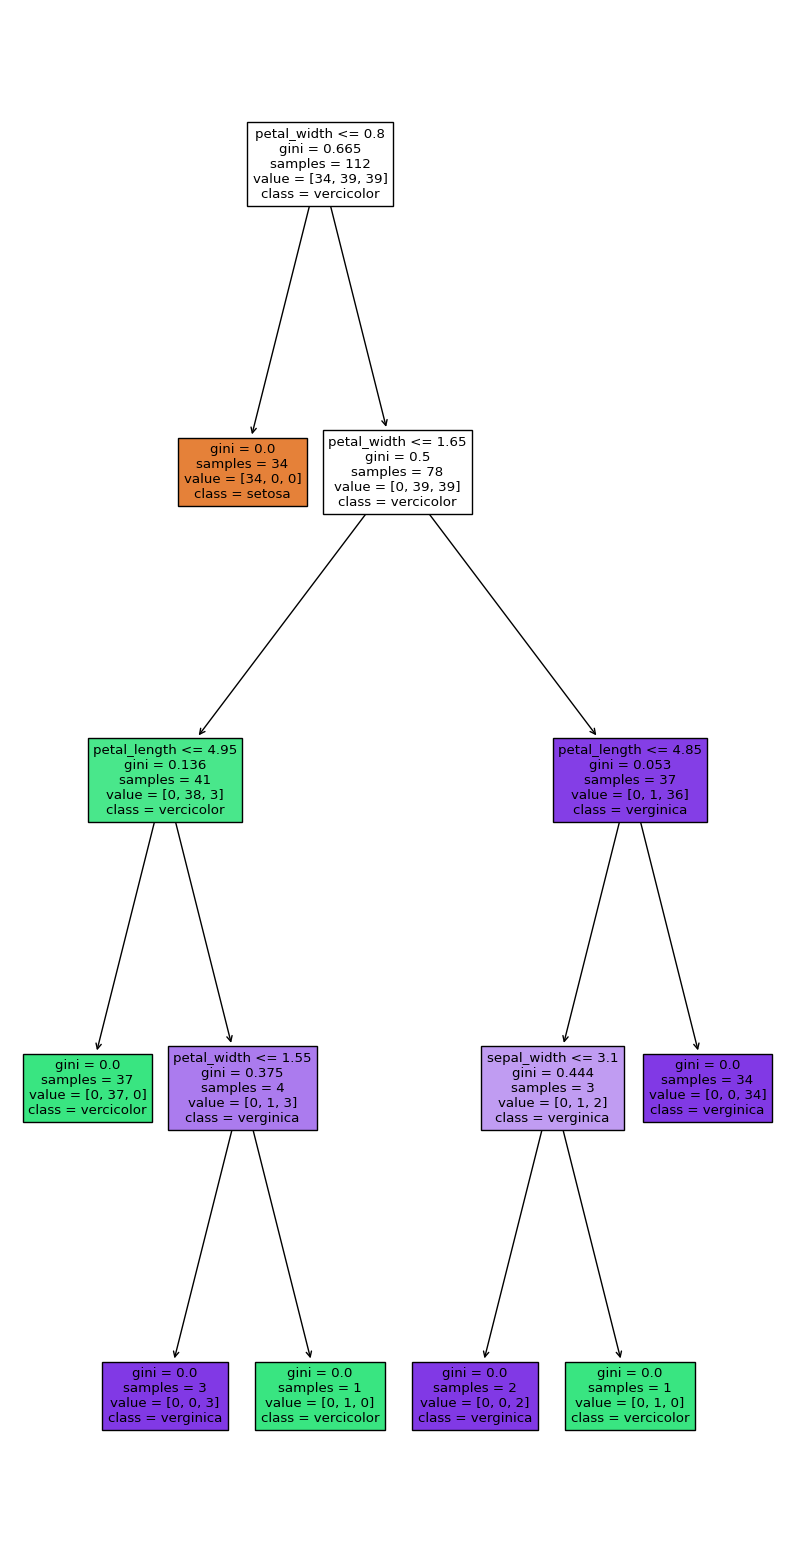

In [61]:
#depicting the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(10,20))
dec_tree=plot_tree(decision_tree=dtree,feature_names=df.columns[:-1],
                   class_names=["setosa","vercicolor","verginica"],filled=True)

#Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [63]:
Y_pred3=rf.predict(X_test)

**Evaluation:**

In [64]:
#confusion matrix
confusion_matrix(Y_test,Y_pred3)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 11]])

Text(50.722222222222214, 0.5, 'Predicted values')

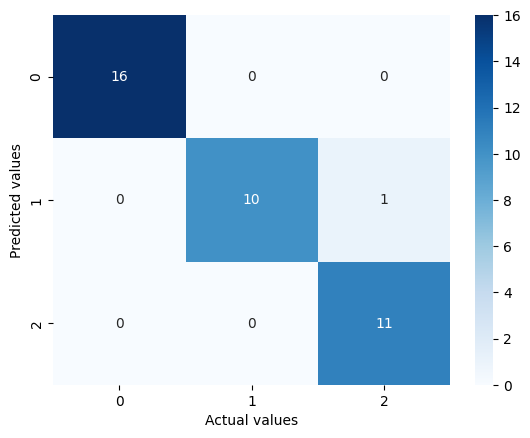

In [65]:
sns.heatmap(data=confusion_matrix(Y_test,Y_pred3),annot=True,cmap='Blues')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [66]:
#Accuracy score
accuracy_score(Y_test,Y_pred3)

0.9736842105263158